Copyright (c) 2023, University of California, Merced. All rights reserved.

This file is part of the MummyNutsBench software package developed by
the team members of Prof. Xiaoyi Lu's group (PADSYS Lab) at the University
of California, Merced.

For detailed copyright and licensing information, please refer to the license
file LICENSE in the top level directory.

In [ ]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15412, done.
remote: Total 15412 (delta 0), reused 0 (delta 0), pack-reused 15412
Receiving objects: 100% (15412/15412), 14.02 MiB | 6.88 MiB/s, done.
Resolving deltas: 100% (10356/10356), done.


In [ ]:
# Only run this one instead of the one above if doing live webcam
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

/content/darknet


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [ ]:
# make darknet (builds darknet so that you can then use the darknet executable file to run or train object detectors)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old ==

# Download MS COCO pre-trained weights

In [ ]:
#!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights

In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
# This stops 'Run all' at this cell by causing an error
assert False

AssertionError: ignored

In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Mounted at /content/gdrive


In [ ]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
#!ls /mydrive

In [ ]:
%cd darknet

/content/darknet


In [ ]:
# copy over both datasets into the root directory of the Colab VM (comment out test.zip if you are not using a validation dataset)
!cp /mydrive/yolov4/obj.zip ../
!cp /mydrive/yolov4/test.zip ../

In [ ]:
# unzip the datasets and their contents so that they are now in /darknet/data/ folder
!unzip ../obj.zip -d data/
!unzip ../test.zip -d data/

Archive:  ../obj.zip
  inflating: data/obj/IMG_1_A-0_W-100_H-150.jpg  
  inflating: data/obj/IMG_1_A-0_W-100_H-150.txt  
  inflating: data/obj/IMG_1_A-0_W-150_H-100.jpg  
  inflating: data/obj/IMG_1_A-0_W-150_H-100.txt  
  inflating: data/obj/IMG_1_A-180_W-100_H-100.jpg  
  inflating: data/obj/IMG_1_A-180_W-100_H-100.txt  
  inflating: data/obj/IMG_1_A-180_W-100_H-150.jpg  
  inflating: data/obj/IMG_1_A-180_W-100_H-150.txt  
  inflating: data/obj/IMG_1_A-180_W-150_H-100.jpg  
  inflating: data/obj/IMG_1_A-180_W-150_H-100.txt  
  inflating: data/obj/IMG_10_A-0_W-100_H-100.jpg  
  inflating: data/obj/IMG_10_A-0_W-100_H-100.txt  
  inflating: data/obj/IMG_10_A-0_W-100_H-150.jpg  
  inflating: data/obj/IMG_10_A-0_W-100_H-150.txt  
  inflating: data/obj/IMG_10_A-0_W-150_H-100.jpg  
  inflating: data/obj/IMG_10_A-0_W-150_H-100.txt  
  inflating: data/obj/IMG_10_A-180_W-100_H-100.jpg  
  inflating: data/obj/IMG_10_A-180_W-100_H-100.txt  
  inflating: data/obj/IMG_10_A-180_W-100_H-150.jpg  
  

# CFG

In [ ]:
# upload the custom .cfg back to cloud VM from Google Drive
!cp /mydrive/yolov4/yolov4-obj.cfg ./cfg

In [ ]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/yolov4/obj.names ./data
!cp /mydrive/yolov4/obj.data  ./data

In [ ]:
# upload the generate_train.py and generate_test.py script to cloud VM from Google Drive
!cp /mydrive/yolov4/generate_train.py ./
!cp /mydrive/yolov4/generate_test.py ./

In [ ]:
!python generate_train.py
!python generate_test.py

In [ ]:
# verify that the newly generated train.txt and test.txt can be seen in our darknet/data folder
!ls data/

9k.tree     giraffe.jpg		      labels		person.jpg  voc.names
coco9k.map  goal.txt		      obj		scream.jpg
coco.names  horses.jpg		      obj.data		test
dog.jpg     imagenet.labels.list      obj.names		test.txt
eagle.jpg   imagenet.shortnames.list  openimages.names	train.txt


# Download Pre-Trained Weights

In [ ]:
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

```
function ClickConnect(){
console.log("Working"); 
document
  .querySelector('#top-toolbar > colab-connect-button')
  .shadowRoot.querySelector('#connect')
  .click() 
}
setInterval(ClickConnect,60000)
```

In [ ]:
# train your custom detector! (uncomment %%capture below if you run into memory issues or your Colab is crashing)
# %%capture
!./darknet detector train data/obj.data cfg/yolov4-obj.cfg yolov4.conv.137 -dont_show -map #2>&1 > log.txt
download("log.txt")
imShow('chart.png')
download('chart.png')

In [ ]:
# show chart.png of how custom object detector did with training
imShow('chart.png')
download('chart.png')

# Resume Training

In [ ]:
# kick off training from where it last saved
!./darknet detector train data/obj.data cfg/yolov4-obj.cfg /mydrive/yolov4/backup/yolov4-obj_last.weights -dont_show 2>&1 > log2.txt

In [ ]:
download('log2.txt')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Mean Average Precision (mAP)

In [ ]:
!./darknet detector map data/obj.data cfg/yolov4-obj.cfg /content/gdrive/MyDrive/yolov4/yolov4-obj_last.weights

# Inference: Image

In [ ]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov4-obj.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov4-obj.cfg
%cd ..

In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
#!./darknet detector test data/obj.data cfg/yolov4-obj.cfg /content/gdrive/MyDrive/yolov4/backup/yolov4-obj_last.weights /content/gdrive/MyDrive/yolov4/test_images/2_4.JPG -dont_show 2>&1 -ext_output > inference_image_log.txt -thresh 0.5
!./darknet detector test data/obj.data cfg/yolov4-obj.cfg /content/gdrive/MyDrive/yolov4/weights/test_2/yolov4-obj_best.weights /content/gdrive/MyDrive/yolov4/test_images/2_4.JPG -dont_show 2>&1 -ext_output > inference_image_log.txt -thresh 0.1
imShow('predictions.jpg')

In [ ]:
download('inference_image_log.txt')

# Inference: Video



In [ ]:
!./darknet detector demo data/obj.data cfg/yolov4-obj.cfg /content/gdrive/Shareddrives/CSE_120_Team_322/Code/yolov4/backup/yolov4-obj_last.weights -dont_show /content/gdrive/Shareddrives/CSE_120_Team_322/Morning_Star_Visit_Videos/Morning_Star_Data_Darren/walking_rows/single_planter/IMG_3801.MOV -i 0 -out_filename results.avi

In [ ]:
download('results.avi')

# Helper functions for darknet to get detections from yolo

Note: loads config file, data file, and weights from our shared drive. Make sure data file includes the correct weights on line 5 for backup

In [ ]:
# import darknet functions to perform object detections
from darknet import *
# load in our YOLOv4 architecture network
network, class_names, class_colors = load_network("/content/gdrive/MyDrive/yolov4/yolov4-obj.cfg", "/content/gdrive/MyDrive/yolov4/obj.data", "/content/gdrive/MyDrive/yolov4/weights/test_2/yolov4-obj_best.weights")
width = network_width(network)
height = network_height(network)

# darknet helper function to run detection on image
def darknet_helper(img, width, height):
  darknet_image = make_image(width, height, 3)
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_resized = cv2.resize(img_rgb, (width, height),
                              interpolation=cv2.INTER_LINEAR)

  # get image ratios to convert bounding boxes to proper size
  img_height, img_width, _ = img.shape
  width_ratio = img_width/width
  height_ratio = img_height/height

  # run model on darknet style image to get detections
  copy_image_from_bytes(darknet_image, img_resized.tobytes())
  detections = detect_image(network, class_names, darknet_image)
  free_image(darknet_image)
  return detections, width_ratio, height_ratio

# Load in single frame and perform instant detections

In [ ]:
frame = cv2.imread('/content/gdrive/MyDrive/yolov4/test_images/1_1.JPG', cv2.COLOR_BGR2RGB)

detections, width_ratio, height_ratio = darknet_helper(frame, width, height)

bbox = ''

bbox_array = frame

for label, confidence, bbox in detections:
  left, top, right, bottom = bbox2points(bbox)
  left, top, right, bottom = int(left * width_ratio), int(top * height_ratio), int(right * width_ratio), int(bottom * height_ratio)
  cv2.rectangle(bbox_array, (left, top), (right, bottom), (255,255,0), 4)
  cv2.putText(bbox_array, "{} {:.2f}%".format(label, float(confidence)),
                  (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 2,
                  (255,255,0), 3)


In [ ]:
# copy contents from shareddrive to colab workspace
!cp /content/gdrive/MyDrive/yolov4/test_images/IMG_4641_Crops.zip ../

In [ ]:
!unzip ../IMG_4641_Crops.zip -d IMG_4641_Crops/

Archive:  ../IMG_4641_Crops.zip
  inflating: IMG_4641_Crops/IMG_4641_Crops/0_0.JPG  
  inflating: IMG_4641_Crops/IMG_4641_Crops/0_1.JPG  
  inflating: IMG_4641_Crops/IMG_4641_Crops/0_2.JPG  
  inflating: IMG_4641_Crops/IMG_4641_Crops/0_3.JPG  
  inflating: IMG_4641_Crops/IMG_4641_Crops/0_4.JPG  
  inflating: IMG_4641_Crops/IMG_4641_Crops/0_5.JPG  
  inflating: IMG_4641_Crops/IMG_4641_Crops/1_0.JPG  
  inflating: IMG_4641_Crops/IMG_4641_Crops/1_1.JPG  
  inflating: IMG_4641_Crops/IMG_4641_Crops/1_2.JPG  
  inflating: IMG_4641_Crops/IMG_4641_Crops/1_3.JPG  
  inflating: IMG_4641_Crops/IMG_4641_Crops/1_4.JPG  
  inflating: IMG_4641_Crops/IMG_4641_Crops/1_5.JPG  
  inflating: IMG_4641_Crops/IMG_4641_Crops/2_0.JPG  
  inflating: IMG_4641_Crops/IMG_4641_Crops/2_1.JPG  
  inflating: IMG_4641_Crops/IMG_4641_Crops/2_2.JPG  
  inflating: IMG_4641_Crops/IMG_4641_Crops/2_3.JPG  
  inflating: IMG_4641_Crops/IMG_4641_Crops/2_4.JPG  
  inflating: IMG_4641_Crops/IMG_4641_Crops/2_5.JPG  
  inflating: I

The below cell runs through all 30_frames and runs inference on each image and provides all plant detections in a single image, confidence, and bounding box locations with respect to image size

We just need a faster way to display it (cv2_imshow may be too slow)


In [ ]:
import glob
import time

frame_path = "/content/darknet/IMG_4641_Crops/IMG_4641_Crops/*.JPG"

for single_frame in glob.glob(frame_path):
  stopwatch = time.time()
  frame = cv2.imread(single_frame, cv2.COLOR_BGR2RGB)

  detections, width_ratio, height_ratio = darknet_helper(frame, width, height)

  bbox = ''
  bbox_array = frame

  detection_count = 0

  for label, confidence, bbox in detections:
    left, top, right, bottom = bbox2points(bbox)
    left, top, right, bottom = int(left * width_ratio), int(top * height_ratio), int(right * width_ratio), int(bottom * height_ratio)
    cv2.rectangle(bbox_array, (left, top), (right, bottom), (255,255,0), 4)
    cv2.putText(bbox_array, "{} {:.2f}%".format(label, float(confidence)),
                    (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 2,
                    (255,255,0), 3)
    detection_count += 1
    
  print('\033[90m{}'.format(single_frame[47:]), '\033[96m NUM_DET:\033[92m{}'.format(detection_count), '\033[96m DET_TIME:\033[92m{} millis'.format(int((time.time() - stopwatch)*1000)),'\033[93m{}'.format(detections))

5_0.JPG  NUM_DET:0  DET_TIME:51 millis []
2_4.JPG  NUM_DET:2  DET_TIME:43 millis [('nut', '55.15', (404.1382751464844, 306.50592041015625, 24.851512908935547, 17.30654525756836)), ('nut', '97.37', (10.297332763671875, 130.4422607421875, 21.838199615478516, 19.830286026000977))]
3_0.JPG  NUM_DET:1  DET_TIME:42 millis [('nut', '94.16', (168.7552032470703, 284.0873107910156, 11.54952621459961, 9.185870170593262))]
1_2.JPG  NUM_DET:0  DET_TIME:41 millis []
5_3.JPG  NUM_DET:0  DET_TIME:44 millis []
1_4.JPG  NUM_DET:0  DET_TIME:40 millis []
3_1.JPG  NUM_DET:0  DET_TIME:41 millis []
4_1.JPG  NUM_DET:0  DET_TIME:39 millis []
1_3.JPG  NUM_DET:0  DET_TIME:38 millis []
5_4.JPG  NUM_DET:0  DET_TIME:38 millis []
3_3.JPG  NUM_DET:0  DET_TIME:39 millis []
1_0.JPG  NUM_DET:0  DET_TIME:40 millis []
2_3.JPG  NUM_DET:1  DET_TIME:39 millis [('nut', '75.86', (193.0433807373047, 282.97613525390625, 19.467716217041016, 28.912538528442383))]
0_2.JPG  NUM_DET:0  DET_TIME:39 millis []
2_2.JPG  NUM_DET:7  DET_TI

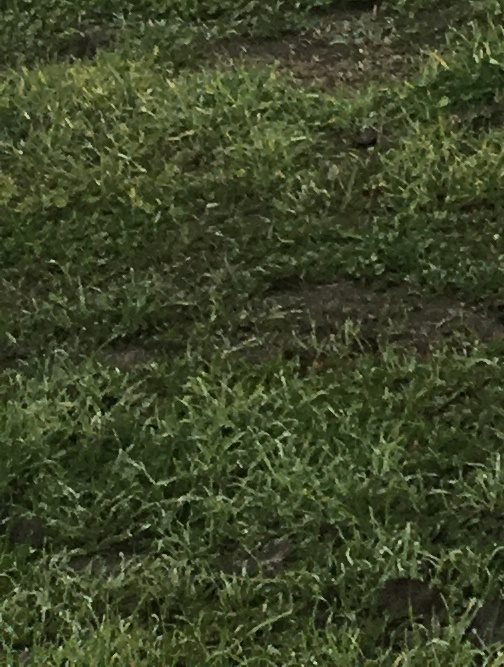

rops/5_0.JPG  NUM_DET:0  DET_TIME:197 millis []


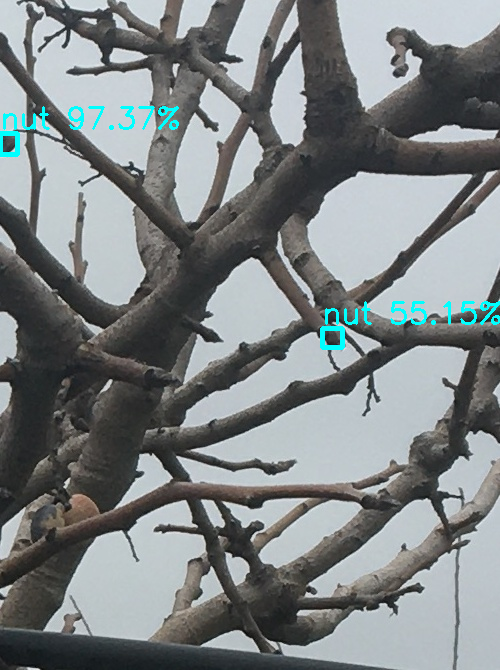

rops/2_4.JPG  NUM_DET:2  DET_TIME:201 millis [('nut', '55.15', (404.1382751464844, 306.50592041015625, 24.851512908935547, 17.30654525756836)), ('nut', '97.37', (10.297332763671875, 130.4422607421875, 21.838199615478516, 19.830286026000977))]
Press Enter to Continue/Type s to save imgs


error: ignored

In [ ]:
import glob
import time

frame_path = "/content/darknet/IMG_4641_Crops/IMG_4641_Crops/*.JPG"

for single_frame in glob.glob(frame_path):
  stopwatch = time.time()
  frame = cv2.imread(single_frame, cv2.COLOR_BGR2RGB)

  detections, width_ratio, height_ratio = darknet_helper(frame, width, height)

  bbox = ''
  bbox_array = frame

  detection_count = 0

  for label, confidence, bbox in detections:
    left, top, right, bottom = bbox2points(bbox)
    left, top, right, bottom = int(left * width_ratio), int(top * height_ratio), int(right * width_ratio), int(bottom * height_ratio)
    cv2.rectangle(bbox_array, (left, top), (right, bottom), (255,255,0), 4)
    cv2.putText(bbox_array, "{} {:.2f}%".format(label, float(confidence)),
                    (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 1,
                    (255,255,0), 2)
    detection_count += 1
    
  cv2_imshow(bbox_array)
  print('\033[90m{}'.format(single_frame[42:]), '\033[96m NUM_DET:\033[92m{}'.format(detection_count), '\033[96m DET_TIME:\033[92m{} millis'.format(int((time.time() - stopwatch)*1000)),'\033[93m{}'.format(detections))

  if detection_count > 0:  
    next = input('Press Enter to Continue/Type s to save img')
    if next == 's':
      #cv2.imwrite("detection_results", bbox_array)


# This line of code provides instant detections

In [ ]:
print(detections)

[]


# This line of code displays detections 

but imshow takes some time to load

reduce resolution to save running time?

open live viewing window?

In [ ]:
cv2_imshow(bbox_array)

In [ ]:
cv2.imwrite("detection_results", bbox_array)